In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.rcParams["figure.figsize"] = (20,15)

Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
Interpretación de los resultados.

In [3]:
df = pd.read_csv("./Datos/weather.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
df.shape

(8784, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
df.duplicated().sum()

0

Nuestro dataset consta de 8784 registros en 8 columnas. No tenemos datos nulos ni tampoco duplicados.

Date/time > categórica. Es fecha y hora que se toma el registro
Temp_C > numérica. Es la temperatura en grados centígrados
Dew Point Temp_C > numérica. El punto de rocío, en grados centígrados.
Rel Hum_% > numérica. Porcentaje de humedad relativa.
Wind speed > numérica. Velocidad del viento en km/h
Visibilidad > númérica. En km
Presión > numérica. Mediada en pascales
Weather > categórica. Predicción atmosférica

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [10]:
df.describe(include =object).T

,count,unique,top,freq
Date/Time,8784,8784,1/1/2012 0:00,1
Weather,8784,50,Mainly Clear,2106


Observamos en un primer análisis que nuestro dataset recoge datos climáticos de un sitio frío y de temperaturas extremas

In [13]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [14]:
df.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

Análisis visual

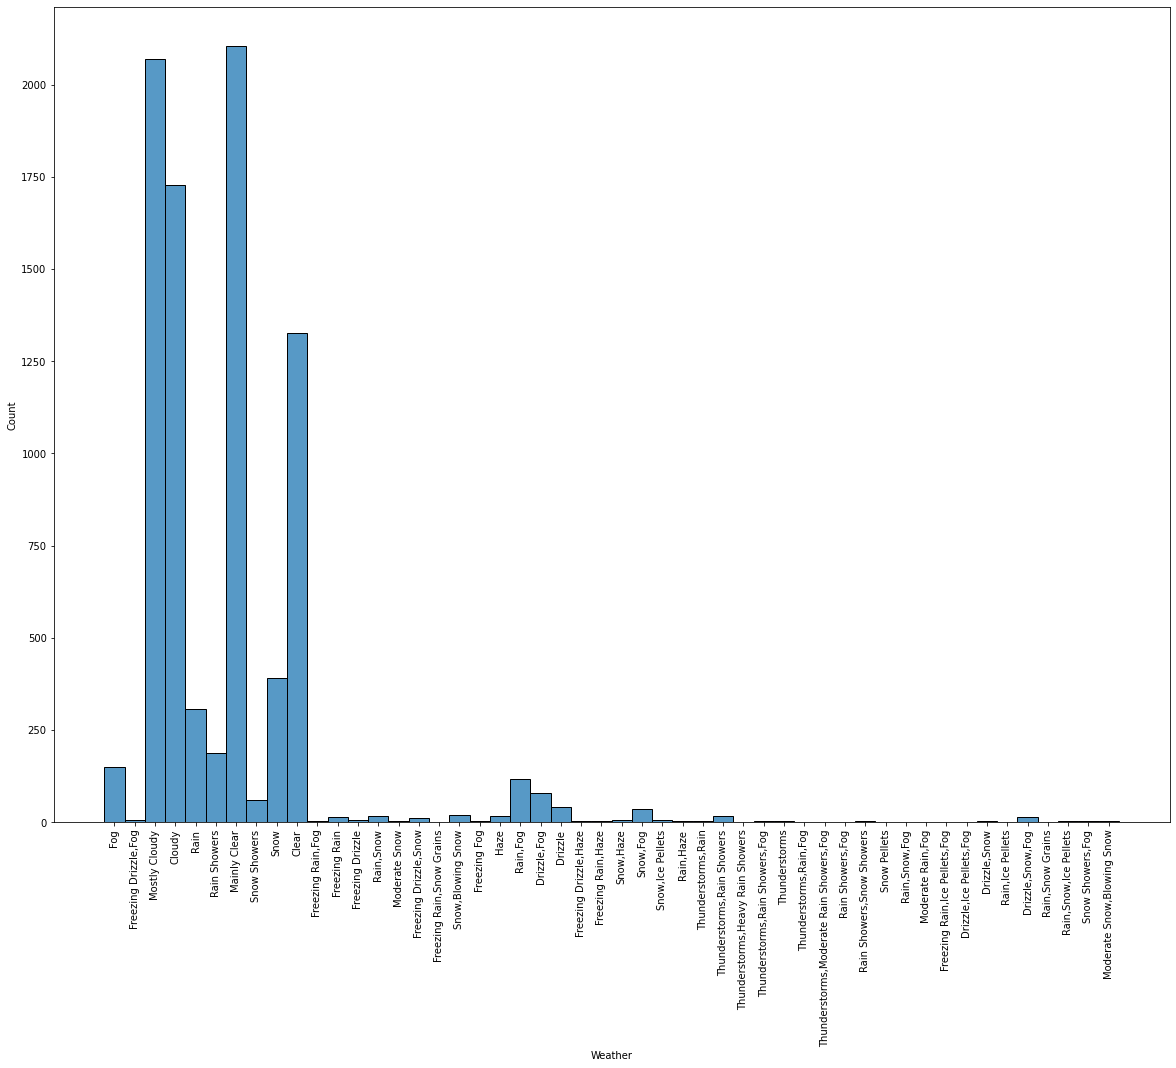

In [22]:
sns.histplot(data=df, x="Weather")

plt.xticks(rotation = 90)
plt.show();

El tiempo que más se da es "mainly clear" y "mostly cloudy". Para poder hacer una regresión logística nos tenemos que quedar con dos columnas.

In [53]:
df2 = df[df["Weather"].isin(["Mostly Cloudy", "Mainly Clear"])]
df2

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8757,12/30/2012 21:00,-13.8,-16.5,80,20,25.0,101.50,Mainly Clear
8758,12/30/2012 22:00,-13.7,-16.3,81,19,25.0,101.54,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [57]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,4175.0,11.575401,11.886824,-23.20,2.40,13.80,21.60,33.00
Dew Point Temp_C,4175.0,3.862850,11.073858,-28.50,-4.70,6.50,13.10,24.40
Rel Hum_%,4175.0,61.378443,15.616235,18.00,51.00,62.00,73.00,100.00
Wind Speed_km/h,4175.0,14.971976,8.421738,0.00,9.00,15.00,20.00,83.00
Visibility_km,4175.0,32.772695,11.541010,11.30,24.10,25.00,48.30,48.30
Press_kPa,4175.0,101.138050,0.753352,98.36,100.68,101.14,101.59,103.65


In [54]:
numericas = df2.select_dtypes(include= np.number)
numericas.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
16,2.6,-0.2,82,13,12.9,99.93
26,3.9,-0.9,71,32,25.0,99.26
27,3.7,-1.5,69,33,25.0,99.30
28,2.9,-2.3,69,32,25.0,99.26
29,2.6,-2.3,70,32,25.0,99.21


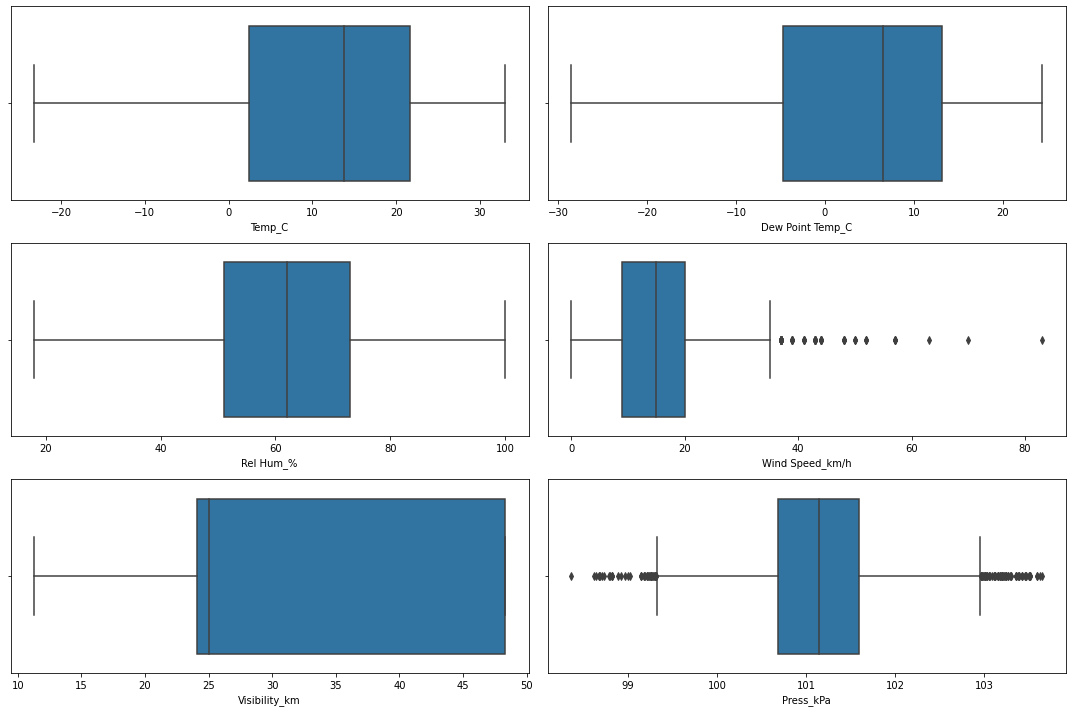

In [55]:
fig, axes = plt.subplots (nrows=3, ncols=2, figsize = (15,10))
axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x= columna, data = df2, ax = axes[indice])
    
plt.tight_layout()
plt.show()

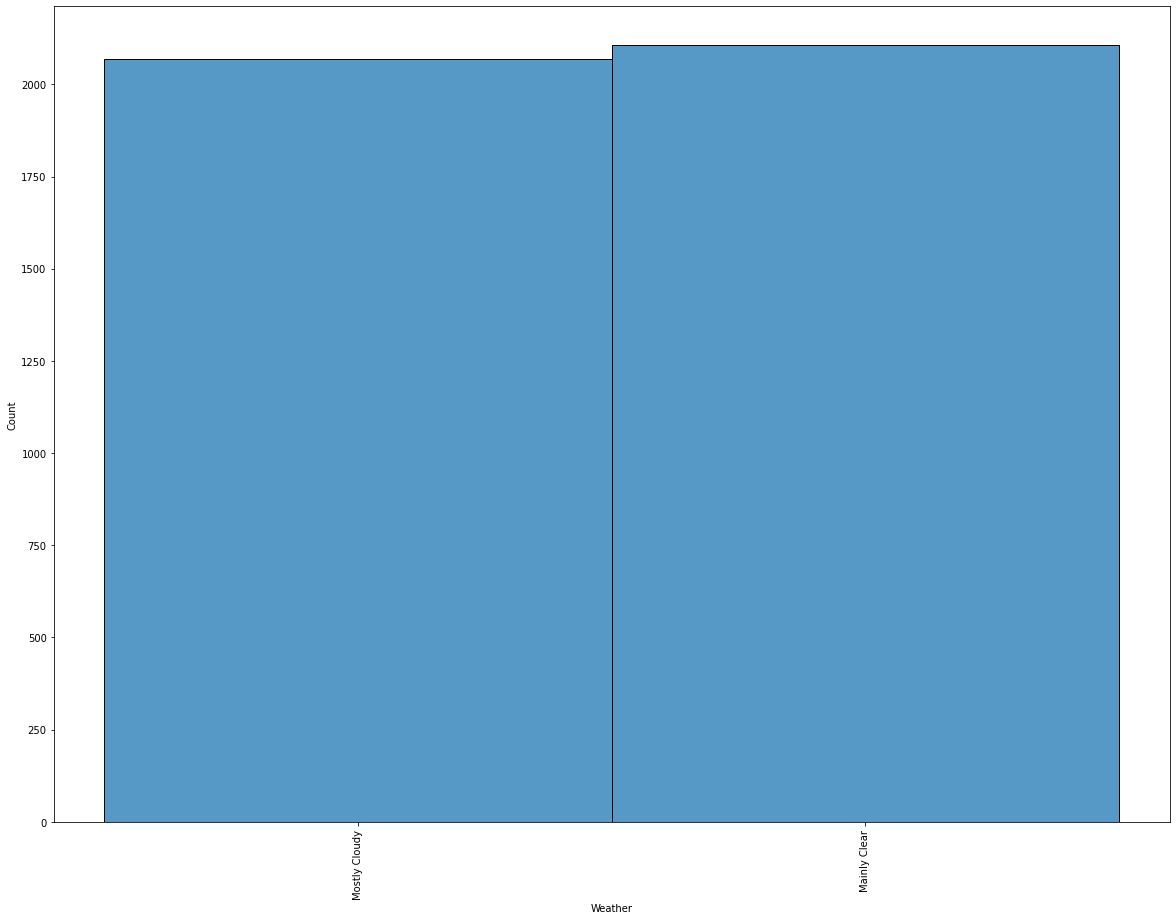

In [60]:
sns.histplot(data=df2, x="Weather")

plt.xticks(rotation = 90)
plt.show();

In [82]:
df2["Wind Speed_km/h"].value_counts()

9     388
13    387
11    387
15    364
17    341
7     329
19    301
6     277
20    235
22    204
4     193
24    169
26    127
0     125
28     98
30     77
32     55
33     34
37     22
35     17
43      9
44      7
39      6
48      5
41      5
57      4
52      3
50      3
83      1
70      1
63      1
Name: Wind Speed_km/h, dtype: int64

In [ ]:
tab = pd.crosstab (index = df ['Edad'], columnas = 'recuento')